<a href="https://colab.research.google.com/github/wisamabdullah85/PythonHacks/blob/main/bitcoinproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [540]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [541]:
data = pd.read_csv('/content/datasetbcfinalmiss.csv')


In [542]:
data.head(10)

,Last Price,Open Price,Max,Min,Size,Change Persent,Class
0,3597.2,3785.7,4070.5,3561.3,3.80,0.0497,Bitcoin
1,3677.8,3597.3,3715.2,3473.2,3.50,0.0224,Bitcoin
2,3570.9,3676.2,3699.1,3465.2,3.16,0.0291,Bitcoin
3,3502.5,3570.9,3583.2,3368.2,3.68,0.0192,Bitcoin
4,3661.4,3502.3,3721.1,3382.5,3.78,0.0454,Bitcoin
5,3616.8,3661.0,3681.1,3580.2,3.65,0.0122,Bitcoin
6,4120.4,3616.8,4152.6,3607.9,5.61,0.1392,Bitcoin
7,3823.1,4120.5,4194.2,3701.9,12.42,0.0721,Bitcoin
8,3944.3,3823.2,3964.0,3681.8,19.19,0.0317,Bitcoin
9,4006.4,3944.4,4050.6,3817.1,19.44,0.0157,Bitcoin


In [543]:
data.describe()

,Last Price,Open Price,Max,Min,Size,Change Persent
count,2698.000000,2740.000000,2740.000000,2740.000000,2738.000000,2740.000000
mean,1972.090376,1937.333705,2088.396625,1781.707454,113.561150,5474.532281
std,7942.475462,7881.037024,8474.909262,7241.345498,216.484212,16252.399715
min,0.001687,0.001687,0.001925,0.001291,1.000000,0.000000
25%,0.998400,0.998400,1.000300,0.985375,4.825000,0.024300
50%,2.898750,2.398770,2.785490,2.135680,15.400000,0.072500
75%,143.717750,141.187500,156.156500,121.655000,96.662500,0.183475
max,64398.600000,64397.200000,68990.600000,61347.200000,992.610000,90000.000000


In [544]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Last Price      2698 non-null   float64
 1   Open Price      2740 non-null   float64
 2   Max             2740 non-null   float64
 3   Min             2740 non-null   float64
 4   Size            2738 non-null   float64
 5   Change Persent  2740 non-null   float64
 6   Class           2740 non-null   object 
dtypes: float64(6), object(1)
memory usage: 150.0+ KB


In [545]:
data.shape

(2740, 7)

In [546]:
data.columns

Index(['Last Price', 'Open Price', 'Max', 'Min', 'Size', 'Change Persent',
       'Class'],
      dtype='object')

In [547]:
data['Last Price'].fillna(0, inplace = True)
data['Size'].fillna(0, inplace = True)

In [548]:
print(data.isnull().sum())

Last Price        0
Open Price        0
Max               0
Min               0
Size              0
Change Persent    0
Class             0
dtype: int64


In [549]:
# معالجة البيانات: التحويل القياسي (Normalization)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [550]:
# معالجة البيانات: التحويل القياسي
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Class', axis=1))  # استبدال 'target_column' بالعمود المناسب

# إعادة تعبئة البيانات المعالجة في DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[:-1])  # استبدال '-1' بعدد الأعمدة في مجموعة البيانات

# إضافة عمود التصنيف إلى DataFrame المعالج
scaled_df['Class'] = data['Class']

# حفظ البيانات المعالجة إلى ملف CSV
scaled_df.to_csv('preprocessed_dataset.csv', index=False)

In [551]:
X = data.drop('Class', axis=1)  # استبدال 'target_column' بالعمود المناسب
y = data['Class']


In [552]:
# تقسيم البيانات إلى بيانات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [553]:
# التصنيف الشجري
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_scaled, y_train)
tree_pred = tree_clf.predict(X_test_scaled)

In [554]:
# المنطق اللوجستي
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)


In [555]:
# تصنيف الجيرسي
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)

In [556]:
# التصنيف العشوائي
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)

In [557]:
# حساب confusion matrix لكل نموذج
tree_cm = confusion_matrix(y_test, tree_pred)
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Confusion Matrix for Decision Tree:")
print(tree_cm)
print("\nConfusion Matrix for Logistic Regression:")
print(log_reg_cm)
print("Confusion Matrix for knn:")
print(knn_cm)
print("Confusion Matrix for rf:")
print(rf_cm)



Confusion Matrix for Decision Tree:
[[ 8  0  0  0  0  0  0  0 33  0  2  0  0]
 [ 0 39  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  2  0  3  0  0  0  0  0  3]
 [ 3  0  0 40  0  0  0  0  0  0  1  0  0]
 [ 0  0  3  0 39  1  3  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  4  0  0  0  4  0  2]
 [ 1  0  4  0  0  1 24  0  0  0  0  0  7]
 [ 0  0  0  0  0  0  0 25  0  6  0 10  0]
 [47  0  0  0  0  0  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  0  0  7  0 30  0  6  0]
 [ 2  0  0  0  0  6  0  0  0  0 29  0  0]
 [ 0  0  0  0  0  0  0  7  0 11  1 18  0]
 [ 0  0  2  0  0  2  8  0  0  0  0  0 32]]

Confusion Matrix for Logistic Regression:
[[43  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0  0  0  0]
 [18  0 11  0  7  6  2  0  0  0  0  0  0]
 [37  0  0  0  0  2  2  0  0  0  3  0  0]
 [ 2  0  4  0 21  0 18  0  0  0  1  0  0]
 [14  0  0  0  0 18  9  0  0  0  2  0  0]
 [15  0  5  0  0  0 14  0  0  0  3  0  0]
 [ 6  0  0  0  0  7  5 15  0  4  3  1  0]
 [47  0  0  0  0  1  0  0  0  0  2  0 

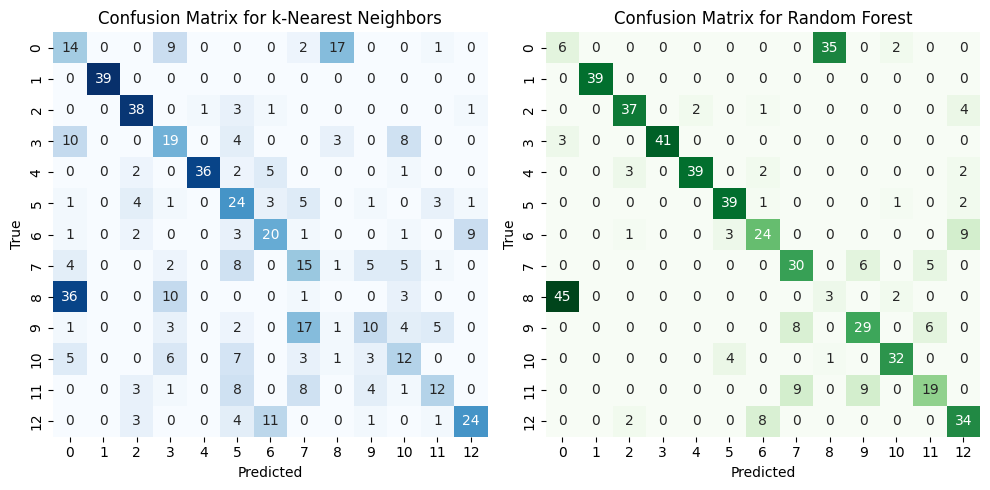

In [558]:
# رسم confusion matrix
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix for k-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [559]:
# حساب دقة كل نموذج
tree_accuracy = np.sum(np.diag(tree_cm)) / np.sum(tree_cm)
log_reg_accuracy = np.sum(np.diag(log_reg_cm)) / np.sum(log_reg_cm)

print("Accuracy for Decision Tree:", tree_accuracy)
print("Accuracy for Logistic Regression:", log_reg_accuracy)
# حساب الدقة لكل نموذج
knn_accuracy = np.trace(knn_cm) / np.sum(knn_cm)
rf_accuracy = np.trace(rf_cm) / np.sum(rf_cm)

print("Accuracy for k-Nearest Neighbors:", knn_accuracy)
print("Accuracy for Random Forest:", rf_accuracy)


Accuracy for Decision Tree: 0.6459854014598541
Accuracy for Logistic Regression: 0.33394160583941607
Accuracy for k-Nearest Neighbors: 0.47992700729927007
Accuracy for Random Forest: 0.6788321167883211


In [560]:
# حساب معامل الارتباط بين المتغيرات
correlation_matrix = data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Last Price  Open Price       Max       Min      Size  \
Last Price        1.000000    0.994606  0.997832  0.997830  0.238054   
Open Price        0.994606    1.000000  0.998125  0.996462  0.231756   
Max               0.997832    0.998125  1.000000  0.996949  0.235002   
Min               0.997830    0.996462  0.996949  1.000000  0.235071   
Size              0.238054    0.231756  0.235002  0.235071  1.000000   
Change Persent   -0.077328   -0.077177 -0.077599 -0.077067  0.079734   

                Change Persent  
Last Price           -0.077328  
Open Price           -0.077177  
Max                  -0.077599  
Min                  -0.077067  
Size                  0.079734  
Change Persent        1.000000  


<ipython-input-560-508dc53554fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<ipython-input-561-e17c3f00e5b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


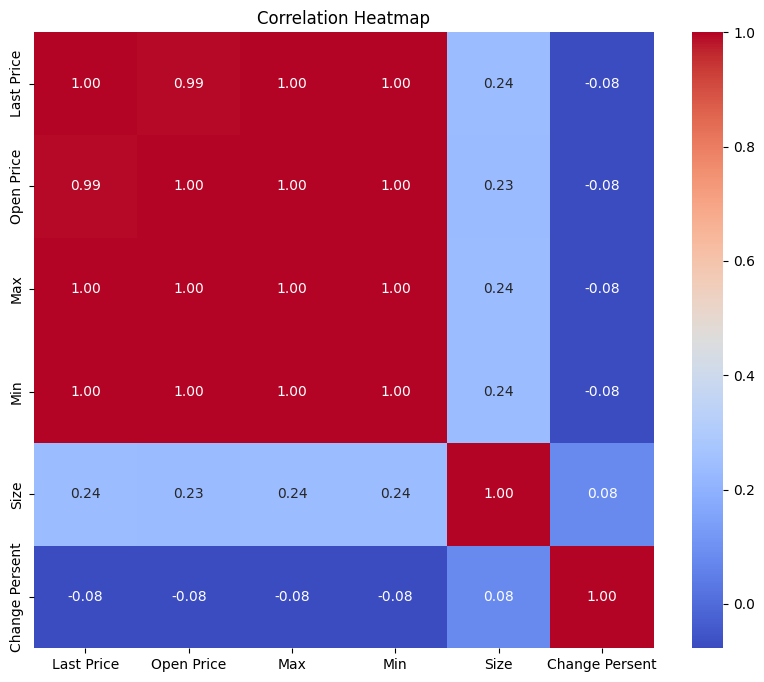

In [561]:
# حساب معامل الارتباط
correlation_matrix = data.corr()

# رسم heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()